In [40]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [41]:
##load data
data = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Data science\CodeAlpha\task2\indexData.csv")
data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [42]:
##remove some columns
df = data.drop(columns = ['Index'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...
112452,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [43]:
##describe about the data set
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       112457 non-null  object 
 1   Open       110253 non-null  float64
 2   High       110253 non-null  float64
 3   Low        110253 non-null  float64
 4   Close      110253 non-null  float64
 5   Adj Close  110253 non-null  float64
 6   Volume     110253 non-null  float64
dtypes: float64(6), object(1)
memory usage: 6.0+ MB


In [45]:
##check duplicate values 
df.duplicated().sum()

789

In [46]:
##remove duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [47]:
##check null values
df.isnull().sum()

Date            0
Open         1415
High         1415
Low          1415
Close        1415
Adj Close    1415
Volume       1415
dtype: int64

In [48]:
##remove null values
df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [49]:
##perform auto EDA
#sweetviz
import sweetviz
report = sweetviz.analyze(df)
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


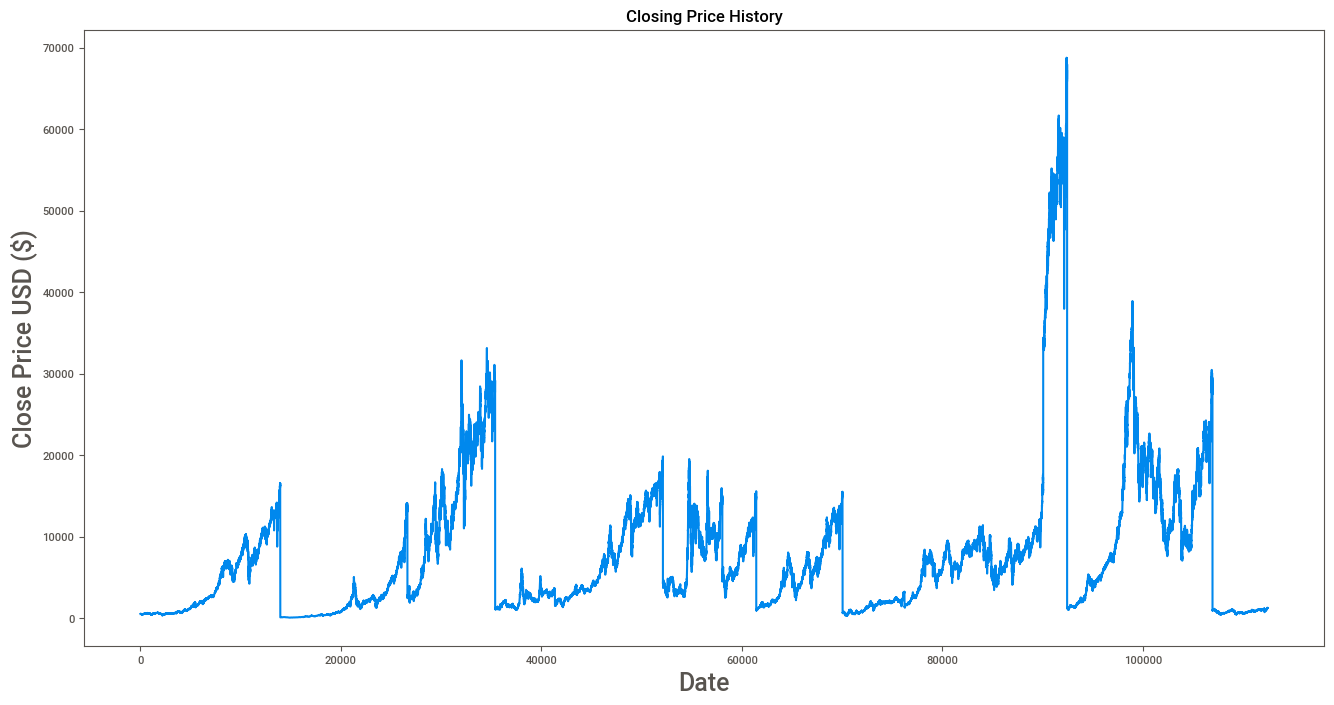

In [52]:
# Plot the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [53]:
# Prepare the data for LSTM
# Use 'Close' price for prediction
data = df['Close'].values
data = data.reshape(-1, 1)

In [54]:
# Scaling the data between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [55]:
# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[0:train_size]
test_data = scaled_data[train_size:]

In [56]:
# Create sequences (X_train) and corresponding targets (y_train) for LSTM
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [57]:
# Generate training data
time_step = 60  # We'll use the last 60 days to predict the next day
X_train, y_train = create_dataset(train_data, time_step)

# Reshape the data for LSTM input: [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [58]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Prevent overfitting
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))  # Output layer for price prediction

C:\Users\ADMIN\.conda\envs\session\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50)

# Prepare the test data
X_test, y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Epoch 1/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 65s 45ms/step - loss: 2.8572e-04
Epoch 2/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 63s 46ms/step - loss: 7.4367e-05
Epoch 3/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 68s 49ms/step - loss: 7.5594e-05
Epoch 4/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - loss: 6.4857e-05
Epoch 5/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 68s 50ms/step - loss: 6.8539e-05
Epoch 6/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 72s 52ms/step - loss: 6.0488e-05
Epoch 7/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - loss: 6.3779e-05
Epoch 8/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - loss: 5.8600e-05
Epoch 9/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 71s 51ms/step - loss: 5.9873e-05
Epoch 10/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - loss: 6.0466e-05
Epoch 11/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - loss: 5.4706e-05
Epoch 12/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 692s 503ms/step - loss: 6.4135e-05
Epoch 13/50
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 70s 51ms/step - loss: 5.4634e-05
Epoch 14/50
1378/13

In [60]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

688/688 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step


In [63]:
# Prepare the test data
X_test, y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [64]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)


688/688 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step


In [65]:
# Create a new DataFrame for validation data starting after the first 'time_step' days
valid = df[train_size:]
valid = valid.iloc[time_step:]  # Align valid with the start of the predictions
valid['Predictions'] = predictions


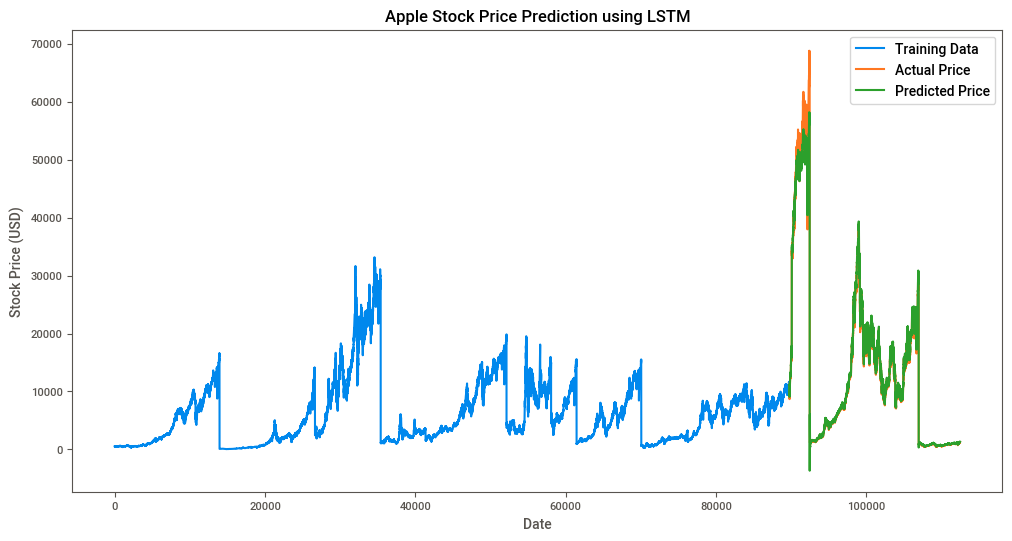

In [66]:
# Plot the actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.title('Apple Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

In [67]:
# Show the actual vs predicted prices
valid[['Close', 'Predictions']].tail()

,Close,Predictions
112452,1247.069946,1314.687988
112453,1256.599976,1317.563721
112454,1248.930054,1326.295166
112455,1258.579956,1321.022583
112456,1263.619995,1327.382690
